We’ll use the popular NetworkX library. It’s simple to install and use, and supports the community detection algorithm we’ll be using.

Creating a new graph with NetworkX is straightforward:

In [2]:
import networkx as nx # this is library for drawing a Graph
G = nx.Graph() # nx is a variable name that we set on our library , it can be any name

But G isn’t much of a graph yet, being devoid of nodes and edges.

### How to Add Nodes to a Graph
We can add a node to the network by chaining on the return value of `Graph()` with `.add_node()` (or `.add_nodes_from()` for multiple nodes in a list). We can also add arbitrary characteristics or attributes to the nodes by passing a dictionary as a parameter, as we show with `node 4` and `node 5`:

In [3]:
G.add_node("node 1") #when you want to add one node
list_of_nodes = ["node 2", "node 3", "node 4", "node 5"] #when we had list of nodes
G.add_nodes_from(list_of_nodes) #add nodes from : will add all together instead of do it one by one

print(G.nodes) # it will print nodes

# please note that, Nodes can have specific features as well for example ("node 4", {"abc": 123})

['node 1', 'node 2', 'node 3', 'node 4', 'node 5']


### How to Add Edges to a Graph
Similar to the technique for nodes, we can use `.add_edge()` with the names of two nodes as parameters (or `.add_edges_from()` for multiple edges in a list), and optionally include a dictionary of attributes.

In [4]:
G.add_edge("node 1", "node 2") # when we want to just add one edge ( because edge does have one start and one end point)
G.add_edge("node 1", "node 6")
list_of_edges = [("node 1", "node 3"), ("node 3", "node 4")] # when we want to have list of edges
G.add_edges_from(list_of_edges) #add edge from : will add alledges together instead of do it one by one

print(G.edges) # it will print nodes

#please note that, we can have different weights for edges as well for example ("node 1", "node 5", {"weight" : 3})

[('node 1', 'node 2'), ('node 1', 'node 6'), ('node 1', 'node 3'), ('node 3', 'node 4')]


NetworkX lists all edges when using `G.edges`, but it does not include their attributes. If we want edge attributes, we can use `G[node_name]` to get everything that’s connected to a node.

In [5]:
print(G.nodes)
print(G.edges)
print(G["node 1"]) # this is telling us print those nodes that they have relationship with Node1 

['node 1', 'node 2', 'node 3', 'node 4', 'node 5', 'node 6']
[('node 1', 'node 2'), ('node 1', 'node 6'), ('node 1', 'node 3'), ('node 3', 'node 4')]
{'node 2': {}, 'node 6': {}, 'node 3': {}}


### How to Generate Images From Graphs (and Weighted Graphs)

Visualizing a graph is essential: It lets us see the relationships between the nodes and the structure of the network quickly and clearly.

A quick call to `nx.draw(G)` is all it takes:

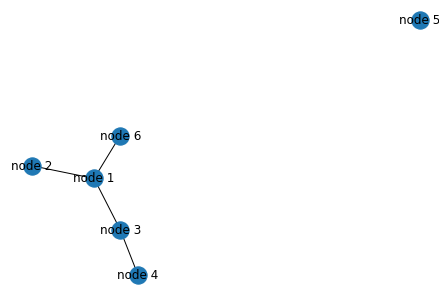

In [10]:
nx.draw(G , with_labels = True) #Draw graph G with demonstrating the lables 



### Graph Data Science Using Data From the Movie Star Wars: Episode IV  Activity for week 11


To make it easier to interpret and understand our results, we’ll use StarWar dataset. Nodes represent important characters, and edges (which aren’t weighted here) signify co-appearance in a scene.

Note: The dataset is from Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479.

First, we’ll visualize the data with `nx.draw(G_starWars, with_labels = True)`:

In [11]:
from StarWar import G_starWars #our data here was like python file where the name is StarWar.py we import G_starWars graph from that 

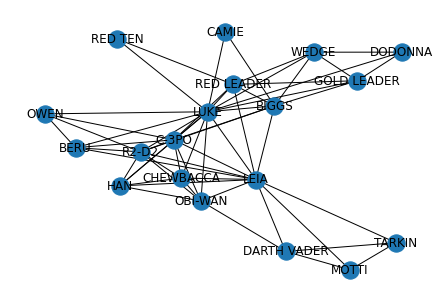

In [15]:
nx.draw(G_starWars, with_labels = True)

### Node Analysis: Degree and PageRank

Now that we can visualize our network clearly, it may be of interest to us to characterize the nodes. There are multiple metrics that describe the characteristics of the nodes and, in our example, of the characters.

One basic metric for a node is its degree: how many edges it has. The degree of a Star Wars character’s node measures how many other characters they shared a scene with.

The `degree()` function can calculate the degree of a character or of the entire network:

In [16]:
print(G_starWars.degree["LUKE"]) #the degree here will find the number edges that we have for each specific Node (LUKE)
print(G_starWars.degree) #This is used to demonstrate for all of them 

#Basically here it demonstarte that we have two ways of writing, we can find for one specific Node or for all
#it all depends what question asked you.

15
[('R2-D2', 9), ('CHEWBACCA', 6), ('C-3PO', 10), ('LUKE', 15), ('DARTH VADER', 4), ('CAMIE', 2), ('BIGGS', 8), ('LEIA', 12), ('BERU', 5), ('OWEN', 4), ('OBI-WAN', 7), ('MOTTI', 3), ('TARKIN', 3), ('HAN', 6), ('DODONNA', 3), ('GOLD LEADER', 5), ('WEDGE', 5), ('RED LEADER', 7), ('RED TEN', 2)]


Sorting nodes from highest to lowest according to degree can be done with a single line of code:

In [17]:
print(sorted(G_starWars.degree, key=lambda x: x[1], reverse=True))

#In the lambda function, we specify the function to sort based on the second element of the tuple, that is, the number.

[('LUKE', 15), ('LEIA', 12), ('C-3PO', 10), ('R2-D2', 9), ('BIGGS', 8), ('OBI-WAN', 7), ('RED LEADER', 7), ('CHEWBACCA', 6), ('HAN', 6), ('BERU', 5), ('GOLD LEADER', 5), ('WEDGE', 5), ('DARTH VADER', 4), ('OWEN', 4), ('MOTTI', 3), ('TARKIN', 3), ('DODONNA', 3), ('CAMIE', 2), ('RED TEN', 2)]


Being just a total, the degree doesn’t take into account details of individual edges. Does a given edge connect to an otherwise isolated node or to a node that is connected with the entire network? Google’s PageRank algorithm aggregates this information to gauge how “important” a node is in a network.

**The PageRank metric can be interpreted as an agent moving randomly from one node to another. Better-connected nodes have more paths leading through them, so the agent will tend to visit them more often.**

Such nodes will have a higher PageRank, which we can calculate with the NetworkX library:

In [26]:
pageranks = nx.pagerank(G_starWars) # A dictionary
print(sorted(pageranks.items(), key=lambda x: x[1], reverse=True))

#OBI-WAN and RED LEADER, they got same degree but when it comes to page rank, we can see RED LEADER comes first
# this is because got stronger page rank compre to OBI-WAN

[('LUKE', 0.12100659993223407), ('LEIA', 0.09774670243167148), ('C-3PO', 0.07846841056739243), ('R2-D2', 0.07109657598978128), ('BIGGS', 0.06716470572053924), ('RED LEADER', 0.06034035361675809), ('OBI-WAN', 0.057499521146130786), ('CHEWBACCA', 0.0489810778291624), ('HAN', 0.0489810778291624), ('GOLD LEADER', 0.045516866707278114), ('WEDGE', 0.045516866707278114), ('BERU', 0.042576910179289884), ('DARTH VADER', 0.040288371907147236), ('OWEN', 0.03537418136290535), ('MOTTI', 0.032623993347091276), ('TARKIN', 0.032623993347091276), ('DODONNA', 0.030227223567836442), ('RED TEN', 0.022078678866886185), ('CAMIE', 0.021887888944363686)]


**Owen is the character with the highest PageRank, surpassing Luke, who had the highest degree**. The analysis: Although Owen is not the character who shares the most scenes with other characters, **he is a character who shares scenes with many important characters such as Luke himself, R2-D2, and C-3PO.**

### Community Detection Algorithms

When analyzing a network it may be important to separate communities: groups of nodes that are highly connected to each other but minimally connected with nodes outside their community.

There are multiple algorithms for this.**Most of them are found within unsupervised machine learning algorithms because they assign a label to the nodes without the need for them to have been labeled previously.**

One of the most famous is **label propagation**. In it, each node starts with a unique label, in a community of one. The labels of the nodes are iteratively updated according to the majority of the labels of the neighboring nodes.

The labels diffuse through the network until all nodes share a label with most of their neighbors. Groups of nodes closely connected to each other end up having the same label.

With the NetworkX library, running this algorithm takes a mere three lines of Python:

In [11]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(G_starWars)
print([community for community in communities])

[{'OBI-WAN', 'GOLD LEADER', 'LUKE', 'CAMIE', 'CHEWBACCA', 'DODONNA', 'LEIA', 'R2-D2', 'RED TEN', 'C-3PO', 'OWEN', 'BIGGS', 'HAN', 'WEDGE', 'RED LEADER', 'BERU'}, {'MOTTI', 'TARKIN', 'DARTH VADER'}]


We’ve seen that getting started with graph data science tools is more straightforward than it might sound. Once we represent data as a graph using the NetworkX library in Python, a few short lines of code can be illuminating. We can visualize our dataset, measure and compare node characteristics, and cluster nodes sensibly via community detection algorithms.